# Question 1


1. Describe how you would evaluate the correlation between horsepower, engine size, and price and find whether engine size significantly impacts price. What statistical test would you use, and why?


## Import Packages


In [50]:
import missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import statsmodels.api as sm


## Read Files

In [51]:
file_path = "Car_Assignment (1).xlsx"
df1 = pd.read_excel(file_path, sheet_name="Car_Assignment1")
df2 = pd.read_excel(file_path, sheet_name="Car_Assignment2")
df3 = pd.read_excel(file_path, sheet_name="Car_Assignment3")


## EDA

In [52]:
#df1.head(10)
#df1.shape
#df1.isnull().sum().sort_values(ascending = False)
#df2.dtypes
#df1.value_counts()
df1.describe()
#df1.nunique()
#missingno.matrix(df3)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,200.000000,200.000000,200.000000,200.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.792500,174.079000,65.888500,53.729500,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.011605,12.239776,2.130685,2.452254,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,96.950000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.200000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Impute Missing Values

In [53]:
df1.wheelbase = df1.wheelbase.fillna(df1.wheelbase.median())
df1.carlength = df1.carlength.fillna(df1.carlength.median())
df1.carwidth = df1.carwidth.fillna(df1.carwidth.median())
df1.carheight = df1.carheight.fillna(df1.carheight.median())

## Calculate Correlation Coefficients

In [54]:
x = df1['horsepower']
y = df1['price']
#corr, p_value = pearsonr(x, y)
corr, p_value = spearmanr(x, y)
print(f"Correlation coefficient: {corr}", f"P-value: {p_value}")

#correlation = df1['horsepower'].corr(df1['price'])
#correlation

Correlation coefficient: 0.8546096111609128 P-value: 1.0967646925749507e-59


In [55]:
x = df1['enginesize']
y = df1['price']
#corr, p_value = pearsonr(x, y)
corr, p_value = spearmanr(x, y)
print(f"Correlation coefficient: {corr}", f"P-value: {p_value}")


#correlation = df1['enginesize'].corr(df1['price'])
#correlation

Correlation coefficient: 0.8259962487887911 P-value: 1.943725626729348e-52


## Test Significance using OLS Regression analysis

In [56]:
X = sm.add_constant(df1['enginesize'])
model = sm.OLS(df1['price'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.35e-65
Time:                        18:35:59   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

## Visualizations

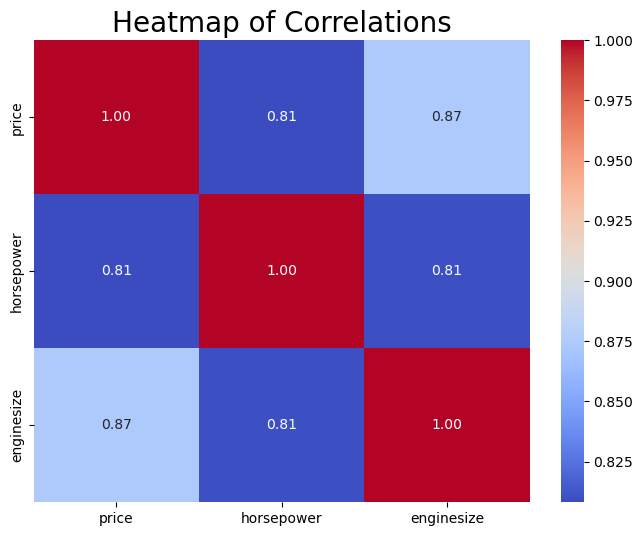

In [57]:
selected_columns = ['price', 'horsepower', 'enginesize']
correlation_matrix = df1[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations',fontsize=20)
plt.show()


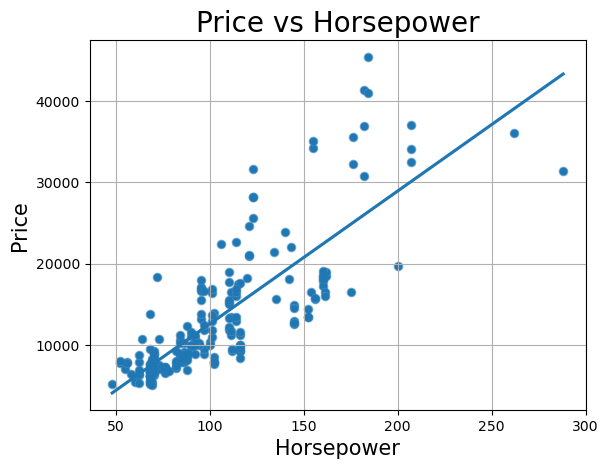

In [58]:
sns.scatterplot(x="horsepower",
                y="price",
                data=df1)

sns.regplot(x="horsepower",
         y="price",
         data=df1,
         ci=None,
         scatter_kws={'alpha': 0.5},
         )

plt.title('Price vs Horsepower',fontsize=20)
plt.xlabel('Horsepower',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(True)
plt.show()

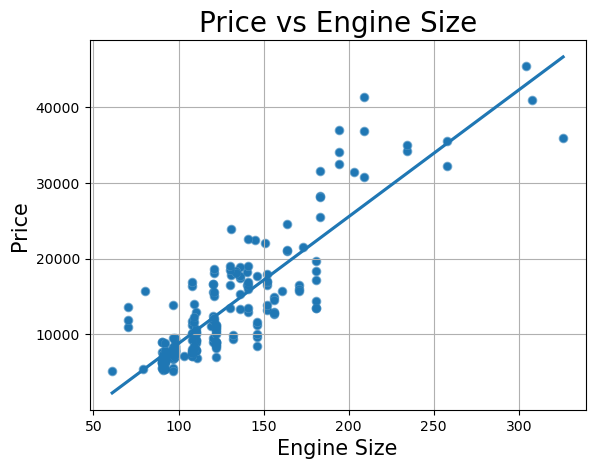

In [59]:
sns.scatterplot(x="enginesize",
                y="price",
                data=df1)

sns.regplot(x="enginesize",
         y="price",
         data=df1,
         ci=None,
         scatter_kws={'alpha': 0.5})
plt.title('Price vs Engine Size',fontsize=20)
plt.xlabel('Engine Size',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(True)
plt.show()
plt.show()

# Question 2
2. Propose a method to analyse if there is a difference in price across different car body types and price across fuel types. And interpret your findings.

## Use ANONVA test To determine significance of relationship betwenn car body and fule type with price

In [60]:
# Car body type ANOVA
import statsmodels.formula.api as smf
model = smf.ols('price ~ C(carbody)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                  sum_sq     df         F    PR(>F)
C(carbody)  1.801997e+09    4.0  8.031976  0.000005
Residual    1.121764e+10  200.0       NaN       NaN


In [61]:
# Car body type ANOVA
import statsmodels.formula.api as smf
model = smf.ols('price ~ C(fueltype)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                   sum_sq     df         F    PR(>F)
C(fueltype)  1.454053e+08    1.0  2.292741  0.131536
Residual     1.287423e+10  203.0       NaN       NaN


## Visualizations

In [62]:
df1_1=df1.groupby(['carbody'])['price'].mean().reset_index()
df1_2=df1.groupby(['fueltype'])['price'].mean().reset_index()


In [63]:
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,96.95,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


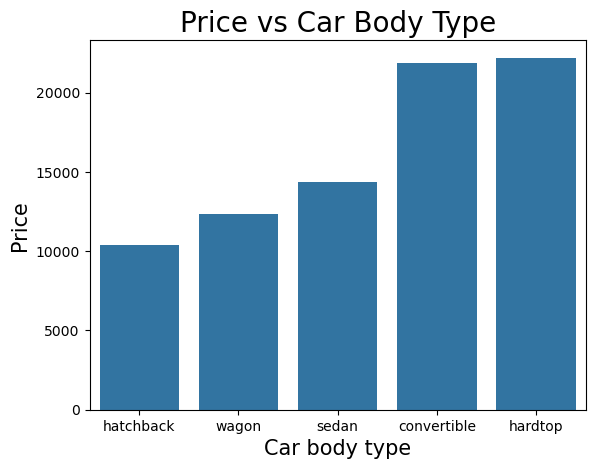

In [64]:
sns.barplot(y="price",x="carbody",data=df1_1.sort_values("price"))
plt.xlabel("Car body type",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title('Price vs Car Body Type',fontsize=20)
plt.show()

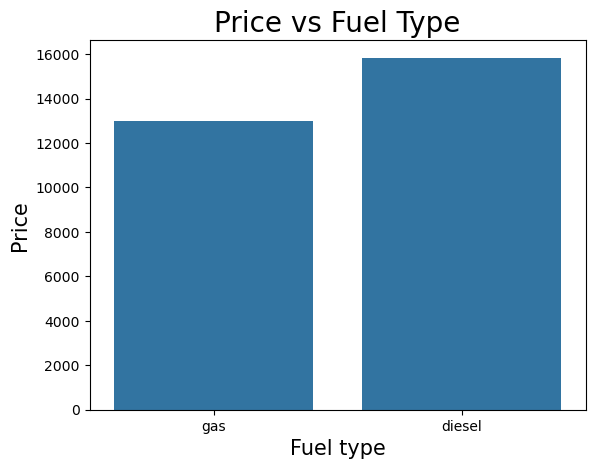

In [65]:
sns.barplot(y="price",x="fueltype",data=df1_2.sort_values("price"))
plt.xlabel("Fuel type",fontsize=15)
plt.ylabel("Price",fontsize=15)
#plt.ylim(0,1)
plt.title('Price vs Fuel Type',fontsize=20)
plt.show()

# Question 3 
3. Find out the relationship between price and car body types. (Use Chi-Square)

## Running a Chi Square Test betwen price and car body types 

In [66]:
# Binning price into categories
df1['price_bin'] = pd.qcut(df1['price'], q=3, labels=["Low", "Medium", "High"])
contingency_table = pd.crosstab(df1['price_bin'], df1['carbody'])

# Chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p}")


P-value: 0.05940757077136245


In [67]:
contingency_table

carbody,convertible,hardtop,hatchback,sedan,wagon
price_bin,,,,,
Low,0,1,33,27,7
Medium,2,3,22,32,10
High,4,4,15,37,8


In [68]:
chi2

14.986547136970731

In [69]:
p

0.05940757077136245

In [70]:
dof

8

# Question 4

4. What approach would you take to build a model predicting price based on the dataset? Outline the steps and explain the challenges you have faced.

## Removing non-numerical data

In [71]:
numeric_df1 = df1.select_dtypes(include=["number"])
numeric_df1 = numeric_df1.drop(["car_ID", "symboling"], axis=1)
numeric_df1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.60,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.60,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.50,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.80,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,96.95,173.2,65.5,54.1,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.10,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.10,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.10,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.10,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## Splitting Data into Training and Test Data Set

In [72]:
msk = np.random.rand(len(numeric_df1)) < 0.8
train = numeric_df1[msk]
test = numeric_df1[~msk]

# Simple Linear Regression

In [73]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[170.19817793]]
Intercept:  [-8136.74046286]


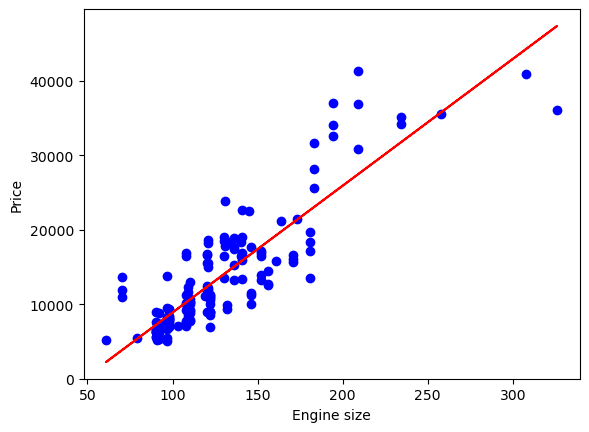

In [74]:
plt.scatter(train.enginesize, train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.show()

In [75]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['enginesize']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 3341.53
Residual sum of squares (MSE): 17757057.31
R2-score: 0.76


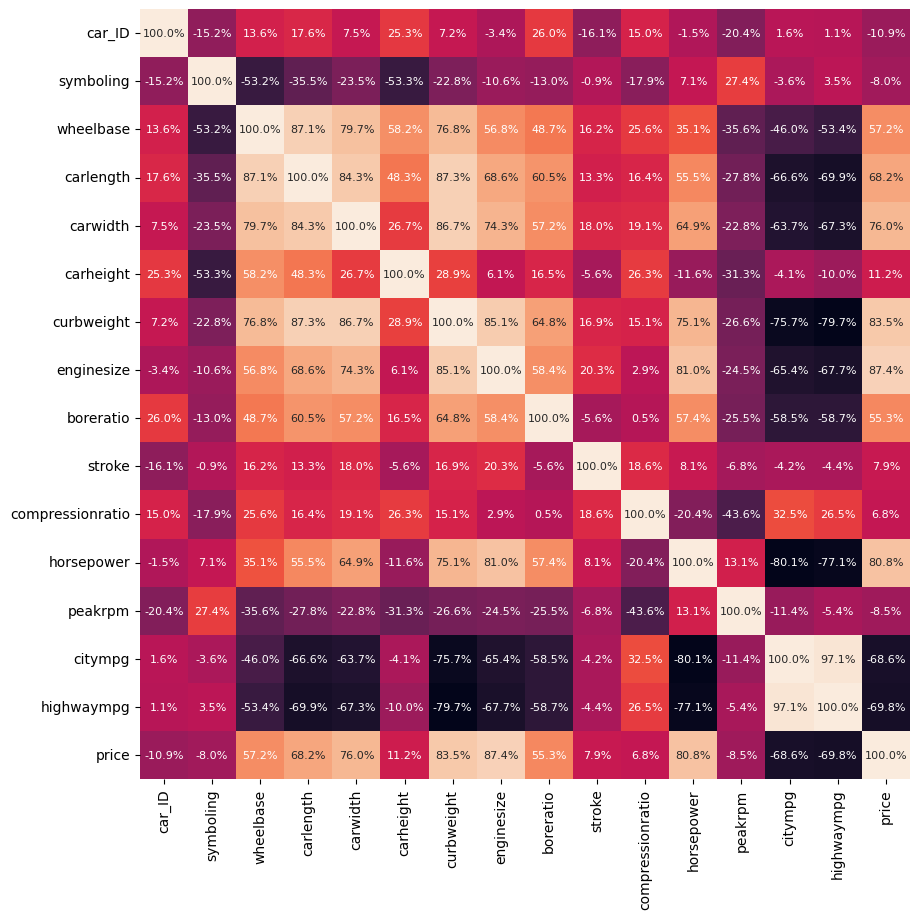

In [76]:
plt.subplots(figsize = (10, 10))
sns.heatmap(df1.corr(numeric_only=True), annot=True, fmt='.1%', square=True, cbar=False, annot_kws={'size': '8'})
plt.rcParams['font.size'] = '16'
plt.show()
sns.reset_orig()

## Multiple Linear Regression


In [77]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train.iloc[:, 0:12])
train_y = np.asanyarray(train[['price']])
train_y_ = regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 3.66339920e+01 -7.96702676e+01  4.02864603e+02  1.95008983e+02
   2.50396798e+00  1.08255711e+02  1.72111474e+02 -2.54697235e+03
   3.15279624e+02  3.85630237e+01  2.80588601e+00 -9.23652376e+01]]


In [78]:
test_x = np.asanyarray(test.iloc[:, 0:12])
test_y_ = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((test_y_ - test_y_) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean Squared Error (MSE) : 0.00
Mean absolute error: 2595.38
Residual sum of squares (MSE): 12621599.78
R2-score: 0.83


5. What features would you consider most important for predicting price, and how would you validate this selection?

Use MLR, comapre with different combination od input data and se  which one give the highest r2 score. 

# Multiple Linear Regression With Selected Columns

In [79]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['enginesize','horsepower','curbweight','carwidth','carlength','citympg','highwaympg']])
train_y = np.asanyarray(train[['price']])
train_y_ = regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  77.05845115   56.56449876    3.96905284  442.30685449  -34.28363317
  -159.56478159  181.80448181]]


In [80]:
test_x = np.asanyarray(test[['enginesize','horsepower','curbweight','carwidth','carlength','citympg','highwaympg']])
test_y_ = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((test_y_ - test_y_) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean Squared Error (MSE) : 0.00
Mean absolute error: 2913.84
Residual sum of squares (MSE): 14431651.06
R2-score: 0.80


# Question 6

6. Find car sales data in CarAssignment2, Give the best sales forecast value for the next quarter (From Jan to Mar).  You can use multiple models, and justify your forecast value as the best.

## Load Data

In [81]:
file_path = "Car_Assignment (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Car_Assignment2")

## Sort Values by Date and remove one entry

In [82]:
df = df.sort_values('Date')
df = df.iloc[:-1]

In [83]:
#df1.head(10)
#df1.shape
df.isnull().sum().sort_values(ascending = False)
#df2.dtypes
#df1.value_counts()
#df1.describe()
#df1.nunique()
#missingno.matrix(df3)

Car_Name    0
Sales       0
Date        0
Price       0
dtype: int64

In [84]:
df

,Car_Name,Sales,Date,Price
0,Tata,10,2023-10-02,5585
1,Tata,10,2023-10-03,6365
2,Audi,10,2023-10-03,6343
3,Tata,10,2023-10-03,5862
4,Tata,13,2023-10-03,5677
...,...,...,...,...
558,Audi,11,2024-10-24,6342
560,Audi,10,2024-10-26,5182
559,BMW,13,2024-10-26,6491
561,BMW,13,2024-10-27,5339


## Group Data by Day, Week And Month

In [85]:
df['Day'] = df['Date'].dt.to_period('D')
df['Week'] = df['Date'].dt.to_period('W')
df['Month'] = df['Date'].dt.to_period('M')


In [86]:

grouped_df_day = df.groupby('Day')['Sales'].sum()
grouped_df_day = grouped_df_day.reset_index()
grouped_df_day.columns = ['Day', 'Total Sales by Day']


In [87]:

grouped_df_week = df.groupby('Week')['Sales'].sum()
grouped_df_week = grouped_df_week.reset_index()
grouped_df_week.columns = ['Week', 'Total Sales by Week']


In [88]:

grouped_df_month = df.groupby('Month')['Sales'].sum()
grouped_df_month = grouped_df_month.reset_index()
grouped_df_month.columns = ['Month', 'Total Sales by Month']


In [89]:
grouped_df_week

,Week,Total Sales by Week
0,2023-10-02/2023-10-08,229
1,2023-10-09/2023-10-15,264
2,2023-10-16/2023-10-22,157
3,2023-10-23/2023-10-29,129
4,2023-10-30/2023-11-05,141
5,2023-11-06/2023-11-12,211
6,2023-11-13/2023-11-19,157
7,2023-11-20/2023-11-26,228
8,2023-11-27/2023-12-03,184
9,2023-12-04/2023-12-10,218


In [90]:
grouped_df_month

,Month,Total Sales by Month
0,2023-10,814
1,2023-11,768
2,2023-12,808
3,2024-01,814
4,2024-02,661
5,2024-03,715
6,2024-04,320
7,2024-05,142
8,2024-06,140
9,2024-07,546


## Data Visualization

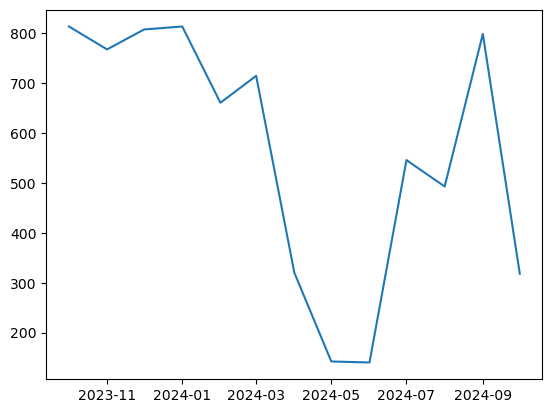

In [91]:
plt.plot(grouped_df_month['Month'].dt.to_timestamp(),grouped_df_month['Total Sales by Month'])
plt.show()

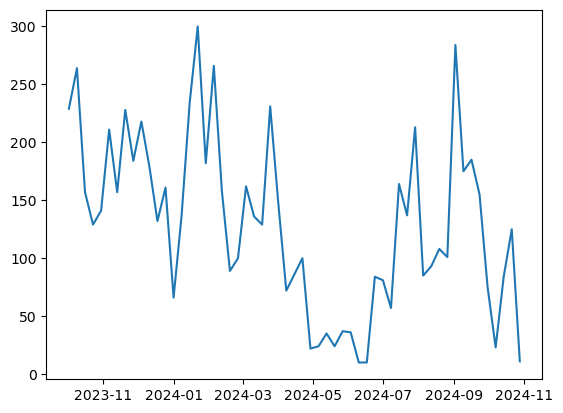

In [92]:
plt.plot(grouped_df_week['Week'].dt.to_timestamp(),grouped_df_week['Total Sales by Week'])
plt.show()

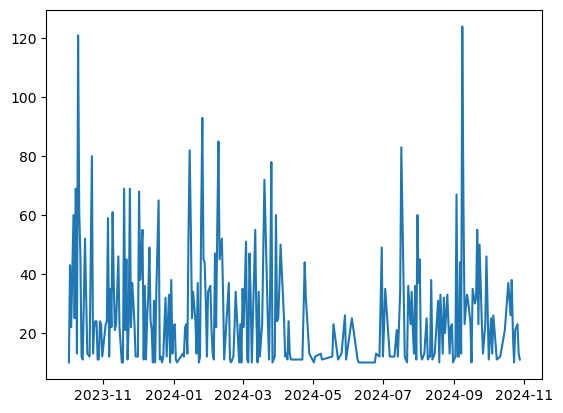

In [93]:
plt.plot(grouped_df_day['Day'].dt.to_timestamp(),grouped_df_day['Total Sales by Day'])
plt.show()

## Using Exponential Smoothing to Predict Sales in the Months of the First Quater

In [94]:
# Example using Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ts = grouped_df_month.set_index('Month')['Total Sales by Month']  # Ensure datetime format

model = ExponentialSmoothing(ts,trend='add').fit()
forecast = model.forecast(5)
print(forecast)


2024-11    343.279243
2024-12    292.920462
2025-01    242.561681
2025-02    192.202900
2025-03    141.844118
Freq: M, dtype: float64


In [95]:
forecast = forecast.reset_index()
forecast.columns = ['Month', 'Total Sales by Month']
forecast

,Month,Total Sales by Month
0,2024-11,343.279243
1,2024-12,292.920462
2,2025-01,242.561681
3,2025-02,192.202900
4,2025-03,141.844118


## Total Sales Predicted for Q1 2025

In [96]:
Sales_Q1_2025 = forecast["Total Sales by Month"].iloc[-3:].sum()
Sales_Q1_2025

576.608698817541

## Data Visualization

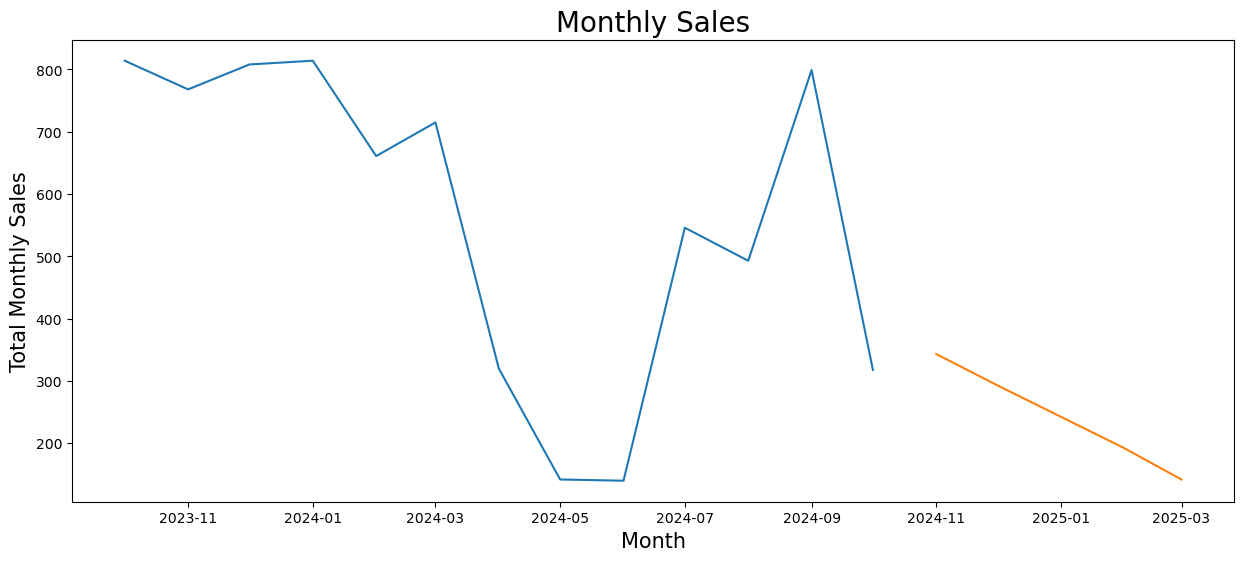

In [97]:
plt.figure(figsize=(15, 6))
plt.plot(grouped_df_month['Month'].dt.to_timestamp(),grouped_df_month['Total Sales by Month'])
plt.plot(forecast['Month'].dt.to_timestamp(),forecast['Total Sales by Month'])
plt.title('Monthly Sales',fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Total Monthly Sales",fontsize=15)
plt.show()


## Using Exponential Smoothing to Predict Sales in the Weeks of the First Quater

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ts = grouped_df_week.set_index('Week')['Total Sales by Week']  # Ensure datetime format

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,52))
model_fit = model.fit()
forecast = model_fit.forecast(steps=22)  # next 4 weeks
forecast = np.maximum(forecast, 0)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24875D-01    |proj g|=  2.33063D-02

At iterate    5    f=  3.19664D-01    |proj g|=  6.81563D-03

At iterate   10    f=  3.18855D-01    |proj g|=  1.13219D-03

At iterate   15    f=  3.18529D-01    |proj g|=  1.86883D-04

At iterate   20    f=  3.18513D-01    |proj g|=  1.41697D-05

At iterate   25    f=  3.18506D-01    |proj g|=  2.43297D-04

At iterate   30    f=  3.18454D-01    |proj g|=  7.12597D-04

At iterate   35    f=  3.18390D-01    |proj g|=  4.56632D-04

At iterate   40    f=  3.18360D-01    |proj g|=  5.95117D-04

At iterate   45    f=  3.18347D-01    |proj g|=  4.14997D-04


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.18341D-01    |proj g|=  2.45682D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   2.457D-04   3.183D-01
  F =  0.31834128493458103     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [99]:
forecast = forecast.reset_index()
forecast.columns = ['Week', 'Total Sales by Week']
forecast

,Week,Total Sales by Week
0,2024-10-28/2024-11-03,9.403905
1,2024-11-04/2024-11-10,73.691165
2,2024-11-11/2024-11-17,18.672299
3,2024-11-18/2024-11-24,88.178803
4,2024-11-25/2024-12-01,44.521374
5,2024-12-02/2024-12-08,77.915731
6,2024-12-09/2024-12-15,39.176083
7,2024-12-16/2024-12-22,0.000000
8,2024-12-23/2024-12-29,20.949473
9,2024-12-30/2025-01-05,0.000000


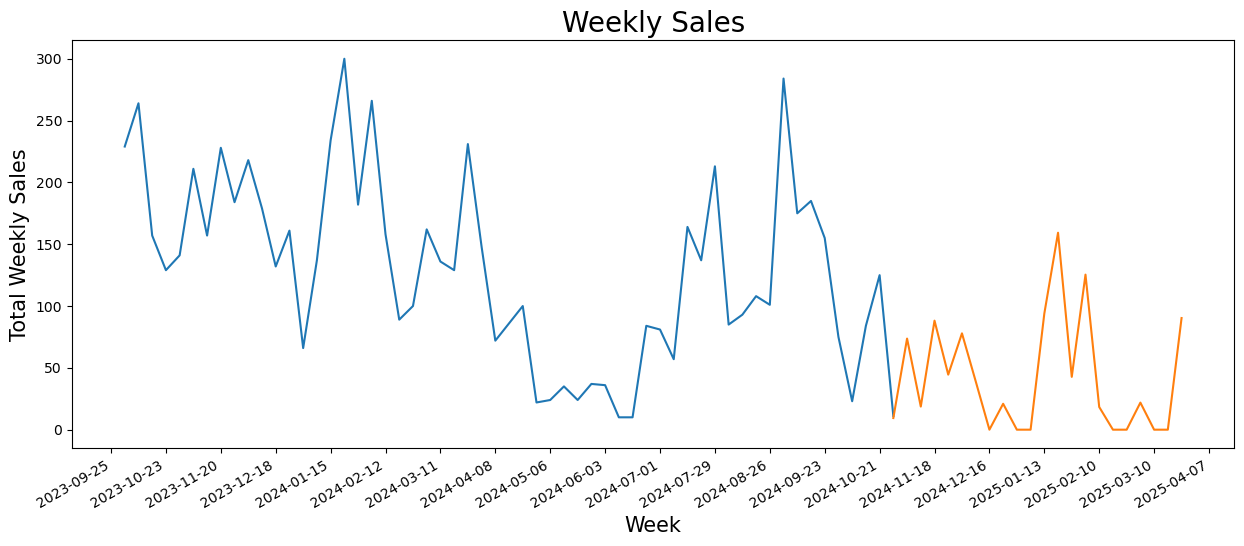

In [100]:
import matplotlib.dates as mdates
import datetime

plt.figure(figsize=(15, 6))
plt.plot(grouped_df_week['Week'].dt.to_timestamp(),grouped_df_week['Total Sales by Week'])
plt.plot(forecast['Week'].dt.to_timestamp(),forecast['Total Sales by Week'])
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0, interval=4))  # Use weekly intervals
plt.gcf().autofmt_xdate()
plt.title('Weekly Sales',fontsize=20)
plt.xlabel("Week",fontsize=15)
plt.ylabel("Total Weekly Sales",fontsize=15)
plt.show()

In [101]:
Sales_Q1_2025 = forecast["Total Sales by Week"].iloc[-13:].sum()
Sales_Q1_2025

551.818743733794

# Question 7
7. Find the relationship between price and ad spend on sales using data in a sheet named CarAssignment3. 

Find correlation. 

## Load Data

In [102]:
file_path = "Car_Assignment (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Car_Assignment3")

In [103]:
df

,Car_Id,Sales,Month,Price,Ad Spend
0,1,26,1,53162,14
1,2,13,1,50117,23
2,3,11,1,51591,24
3,4,10,1,54975,25
4,5,12,1,50103,25
...,...,...,...,...,...
238,37,12,7,58180,21
239,38,13,7,54303,23
240,39,10,7,59612,21
241,40,12,7,54180,13


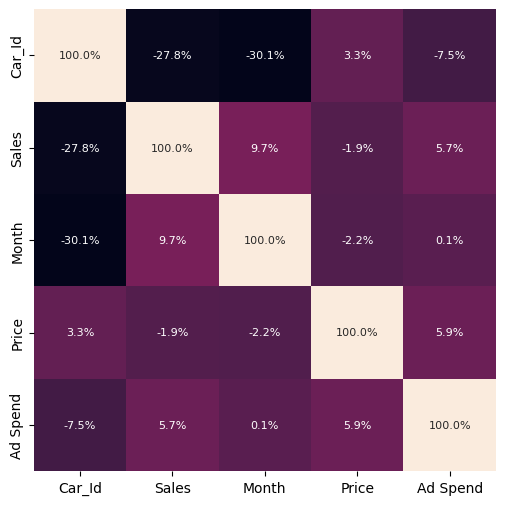

In [104]:
plt.subplots(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1%', square=True, cbar=False, annot_kws={'size': '8'})
plt.rcParams['font.size'] = '16'
plt.show()
sns.reset_orig()

## Test Significance using OLS Regression analysis

In [105]:
X = df[['Price', 'Ad Spend']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4517
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.637
Time:                        18:36:09   Log-Likelihood:                -770.35
No. Observations:                 243   AIC:                             1547.
Df Residuals:                     240   BIC:                             1557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6718      6.963      1.964      0.0